<a href="https://colab.research.google.com/github/Sowbarnika-V/Retinal-Disease-Prediction/blob/main/Retinal_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
#training model
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [ ]:
#Moulding Train images

train_datagen=image.ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=image.ImageDataGenerator(rescale=1./255)

In [ ]:
#Reshaping test and validation images

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/retinal dataset1 ( 3 datasets)/Train (1)',
                                                    target_size=(224,224),
                                                    batch_size=10,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/retinal dataset1 ( 3 datasets)/Val (1)',
                                                        target_size=(224,224),
                                                        batch_size=10,
                                                        class_mode='categorical')

Found 360 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [ ]:
##Train the model
history=model.fit_generator(train_generator,
                            steps_per_epoch=7,
                            epochs=30,
                            validation_data=validation_generator,validation_steps=1)

<ipython-input-7-fc9355e422b6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/30
7/7 [==============================] - 32s 3s/step - loss: 1.5906 - accuracy: 0.4143 - val_loss: 1.1368 - val_accuracy: 0.4000
Epoch 2/30
7/7 [==============================] - 17s 3s/step - loss: 1.1544 - accuracy: 0.3000 - val_loss: 1.1106 - val_accuracy: 0.4000
Epoch 3/30
7/7 [==============================] - 16s 2s/step - loss: 1.0821 - accuracy: 0.4286 - val_loss: 1.1123 - val_accuracy: 0.3000
Epoch 4/30
7/7 [==============================] - 12s 2s/step - loss: 1.1086 - accuracy: 0.3143 - val_loss: 1.0422 - val_accuracy: 0.7000
Epoch 5/30
7/7 [==============================] - 12s 2s/step - loss: 1.1005 - accuracy: 0.3286 - val_loss: 1.0793 - val_accuracy: 0.6000
Epoch 6/30
7/7 [==============================] - 11s 2s/step - loss: 1.0918 - accuracy: 0.4000 - val_loss: 1.0816 - val_accuracy: 0.6000
Epoch 7/30
7/7 [==============================] - 10s 1s/step - loss: 1.0796 - accuracy: 0.3286 - val_loss: 1.1033 - val_accuracy: 0.4000
Epoch 8/30
7/7 [==================

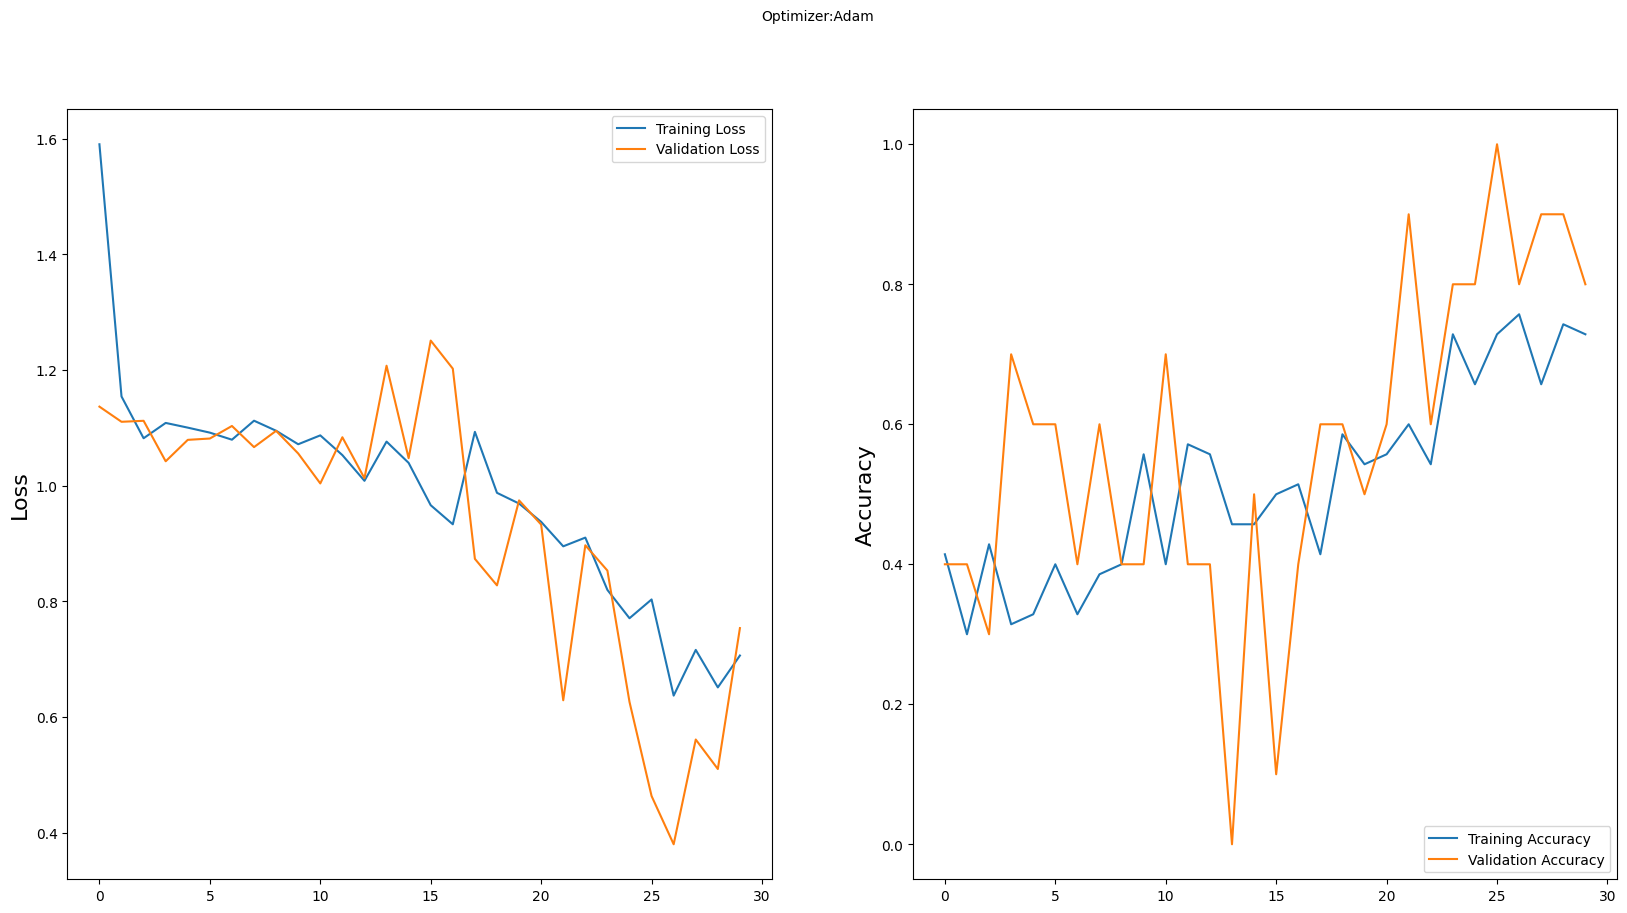

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer:Adam',fontsize=10)
plt.ylabel('Loss',fontsize=16)

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
img=image.load_img('/content/drive/MyDrive/retinal dataset1 ( 3 datasets)/Val (1)/glaucoma/03_g.jpg',target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
ypred=model.predict(img)
ypred=ypred.argmax()
if(ypred==0):
  print("The person is affected by Diabetic retinopathy")
elif(ypred==1):
    print("The person is  affected by glaucoma")
else:
  print("The person is healthy")

1/1 [==============================] - 0s 20ms/step
The person is  affected by glaucoma
